In [66]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import json
import tweepy
import datetime
import time
import warnings
warnings.filterwarnings("ignore")
import api_keys
import seaborn as sn
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [72]:
consumer_key = api_keys.consumer_key
consumer_secret = api_keys.consumer_secret
access_token = api_keys.access_token
access_token_secret = api_keys.access_token_secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [70]:
# ====================== MoodPyTwitter ===============================
# ** define a function that will retrieve data from twitter iterating through list of names
# parameters: (AccountList= input_list, pagecount= scalar value)
# ------------------------pagecount = 5, integer. ** given as 5 on the assignment
def PlotBotTwitter():
    # Run a search for the command term
    mentions = api.search(q="@attila52__ VADER:")

    # Input Tweet
    words = []

    # Specified Twitter Account
    target_account = ""

    # Grab the most recent command tweet
    command = mentions["statuses"][0]["text"]
    requesting_user = mentions["statuses"][0]["user"]["screen_name"]

    # Split it to determine the target account
    words = command.split("VADER:")
    account = words[1].strip()

    # Confirm target_account
    print("Target Account: " + account)
    print("Requesting User: " + requesting_user)    
    
    # reset the output before every use
    global moodpy_df
    moodpy_df = pd.DataFrame({'Date' : [],'SourceName': [],'ScreenName': [],'Texts': [],'VaderComp': [],'VaderNeut': [],'VaderNeg':[]})
    today = datetime.date.today()

    print(">> #MoodPyTwitter ",today)
    Sources, ScreenName, Texts, DateList, Compounds, Positives, Neutrals, Negatives = [],[],[],[],[],[],[],[]

    
    for x in range(5):
        Tweets= api.user_timeline(account,page= x)
        for tweet in Tweets:
            DateList.append(tweet['created_at'])
            Sources.append(tweet['user']['name'])
            ScreenName.append(tweet['user']['screen_name'])
            Texts.append(tweet['text'])
            Compounds.append(analyzer.polarity_scores(tweet["text"])["compound"])
            Positives.append(analyzer.polarity_scores(tweet["text"])["pos"])
            Neutrals.append(analyzer.polarity_scores(tweet["text"])["neu"])
            Negatives.append(analyzer.polarity_scores(tweet["text"])["neg"])
            

    raw_df = pd.DataFrame({'Date' : DateList,
                           'SourceName': Sources,
                           'ScreenName' : ScreenName,
                           'Texts': Texts,
                           'VaderComp': Compounds,
                           'VaderNeut':Neutrals,
                           'VaderNeg':Negatives})
    
    raw_df['Date_dt'] = pd.to_datetime(raw_df['Date'])
    DateSorted_df = raw_df.sort_values("Date_dt", ascending=False)
    DateSortedResetIndex_df = DateSorted_df.reset_index()
    DsRiDropped_df = DateSortedResetIndex_df.drop(columns='index')
    moodpy_df = DsRiDropped_df.copy()
# ====================== MoodPyTwitter: OUTPUT ===============================
    print("\n>> Output ",today)
    print("*  Total of  ", len(moodpy_df['Texts'])," tweets stored in a global dataframe")
    print('*  Please copy/paste below to rename output dataframe as below') 
    print(" _df = Copy_Rename_Output_df.copy() ")
    
#   >> TweetPlotVComp ===========================================================
    
    print(">> #TweetPlotVComp ",today)
    print( 'VADER Compound Index plotted for: ' )
    plt.figure(figsize=(18,10))
    plt.grid(True)
    plt.rcParams["font.size"] = 14
#     plt.rcParams['axes.facecolor'] = 'grey'
    plt.title('auto-bot VADER analysis results for %s:' %account)   
    sourcecomp_series = moodpy_df['VaderComp']
    x_axis = np.arange(-len(sourcecomp_series),0,1)
    #parameters: please see above for details/second line: plot cosmetics         
    plt.plot(x_axis,sourcecomp_series, color='r',linestyle="--",linewidth =0.9, alpha=0.9, marker ='o',  label= account)
    plt.ylabel('VADER Analysis Results: \n Varies from -1 to +1: least liked and most liked')
    plt.xlabel('Last %s tweets of %s' %(len(sourcecomp_series),account))
    print(str(len(sourcecomp_series)),' tweets by', account, " below")
    plt.grid(True)
    filename= str(account)+"_"+str(today)+ "_LinePlot"
# save fig before tweet    
    plt.savefig(filename)
    plt.show()
#     now tweet with image
    
    hashtags = '\n#Bot #TwitterDevelopers #DataScience #BigData #DataScientists #Coding #BigData #DeepLearning  #MachineLearning, #Algorithms #AI #Valance #Sentiment #Analysis'
    api.update_with_media(filename+'.png','auto-bot message: per %s request, VADER Sentiment Analysis results plotted for %s\n %s ' %(requesting_user, account, hashtags))
    print(filename," file saved")
    
    # ====================== MoodPyTwitter: OUTPUT ===============================

    return moodpy_df.head(20)



In [64]:
api.update_status('@attila52__ VADER:@BBCWorld')

{'created_at': 'Tue Oct 16 09:05:35 +0000 2018',
 'id': 1052123376897183744,
 'id_str': '1052123376897183744',
 'text': '@attila52__ VADER:@BBCWorld',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'attila52__',
    'name': 'Attila Türköz',
    'id': 874542160011382784,
    'id_str': '874542160011382784',
    'indices': [0, 11]},
   {'screen_name': 'BBCWorld',
    'name': 'BBC News (World)',
    'id': 742143,
    'id_str': '742143',
    'indices': [18, 27]}],
  'urls': []},
 'source': '<a href="https://github.com/attila5287" rel="nofollow">Twitter_BigData_DU_Bootcamp_app</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': 874542160011382784,
 'in_reply_to_user_id_str': '874542160011382784',
 'in_reply_to_screen_name': 'attila52__',
 'user': {'id': 874542160011382784,
  'id_str': '874542160011382784',
  'name': 'Attila Türköz',
  'screen_name': 'attila52__',
  'location': 'Denver, CO',

Target Account: @BBCWorld
Requesting User: attila52__
>> #MoodPyTwitter  2018-10-16

>> Output  2018-10-16
*  Total of   100  tweets stored in a global dataframe
*  Please copy/paste below to rename output dataframe as below
 _df = Copy_Rename_Output_df.copy() 
>> #TweetPlotVComp  2018-10-16
VADER Compound Index plotted for: 
100  tweets by @BBCWorld  below


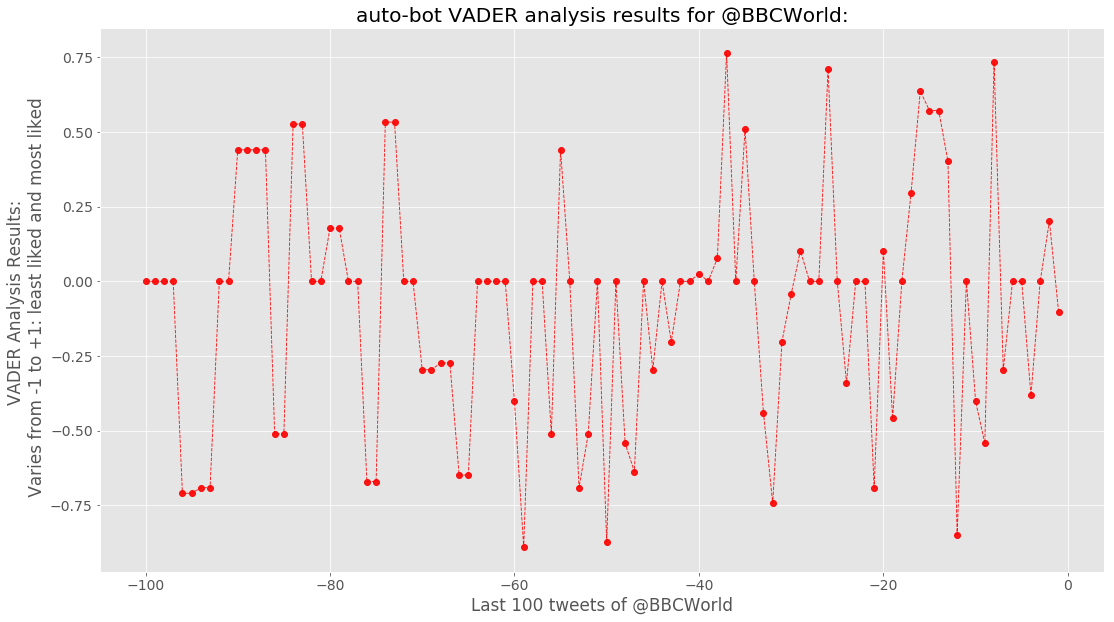

@BBCWorld_2018-10-16_LinePlot  file saved


,Date,SourceName,ScreenName,Texts,VaderComp,VaderNeut,VaderNeg,Date_dt
0,Tue Oct 16 08:58:02 +0000 2018,BBC News (World),BBCWorld,Your US mid-term elections daily digest https:...,0.0000,1.000,0.000,2018-10-16 08:58:02
1,Tue Oct 16 08:58:02 +0000 2018,BBC News (World),BBCWorld,Your US mid-term elections daily digest https:...,0.0000,1.000,0.000,2018-10-16 08:58:02
2,Tue Oct 16 08:41:54 +0000 2018,BBC News (World),BBCWorld,RT @BBCSteveR: As the Russian Orthodox Church ...,0.0000,1.000,0.000,2018-10-16 08:41:54
3,Tue Oct 16 08:41:54 +0000 2018,BBC News (World),BBCWorld,RT @BBCSteveR: As the Russian Orthodox Church ...,0.0000,1.000,0.000,2018-10-16 08:41:54
4,Tue Oct 16 08:08:53 +0000 2018,BBC News (World),BBCWorld,Australian senators blame 'admin error' over c...,-0.7096,0.465,0.535,2018-10-16 08:08:53
5,Tue Oct 16 08:08:53 +0000 2018,BBC News (World),BBCWorld,Australian senators blame 'admin error' over c...,-0.7096,0.465,0.535,2018-10-16 08:08:53
6,Tue Oct 16 07:59:04 +0000 2018,BBC News (World),BBCWorld,The Indian women abandoned because of mental i...,-0.6908,0.551,0.449,2018-10-16 07:59:04
7,Tue Oct 16 07:59:04 +0000 2018,BBC News (World),BBCWorld,The Indian women abandoned because of mental i...,-0.6908,0.551,0.449,2018-10-16 07:59:04
8,Tue Oct 16 07:58:03 +0000 2018,BBC News (World),BBCWorld,US mid-term elections: You choose what happens...,0.0000,1.000,0.000,2018-10-16 07:58:03
9,Tue Oct 16 07:58:03 +0000 2018,BBC News (World),BBCWorld,US mid-term elections: You choose what happens...,0.0000,1.000,0.000,2018-10-16 07:58:03


In [71]:
PlotBotTwitter()